# Infinite Expectation

Suppose we can win $2^k$ dollars with a probability of $2^{-k}$, where $k \ge 1$. i.e.
$$ P(X=2^k) = \frac{1}{2^k} $$

The expectation of the gain would be:
$$
E(X) = \sum_{k=1}^{\infty} 2^n \cdot \frac{1}{2^k} = \infty
$$

Really? Why don't we simulate it and see what would happen.

# Simulation

Of course we need a random number generator that can generate random number up to positive infinity. And of course we can't do that in $O(1)$ time and space. However, we can write a program that keep trying to generate the random number. The generator would take more time, but theoratically it can generate random numbers up to positive infinity.

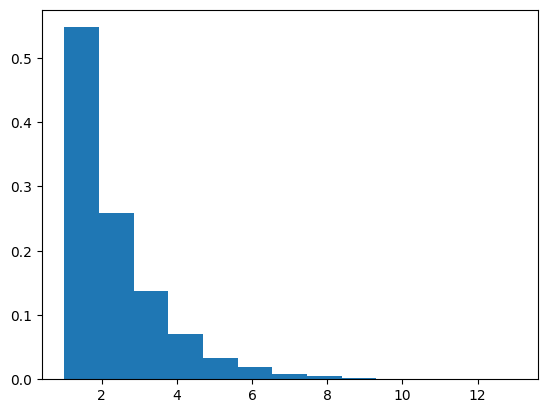

In [117]:
import random

def generate_infinite_random_int():
    k = 1
    while True:
        if random.randint(0, 1):
            return k
        k += 1

from matplotlib import pyplot as plt

data = [generate_infinite_random_int() for _ in range(10000)]
plt.hist(data, bins=max(data), density=True)
plt.show()

Well, it looks good.

Now let's try expectation. Some say that if we play the game $n$ times, the total gain would be roughly $n \log_2 n$, i.e. the average gain would be $\log_2 n$. Mathmatically, if
$$P(X_n=2^k)=\frac{1}{2^k}$$
and let
$$ S_n=\sum_{k=1}^{n}X_k $$
then
$$ \frac{S_n}{n \log_2 n} \xrightarrow[]{p} 1 $$
Lets check if it's correct. 

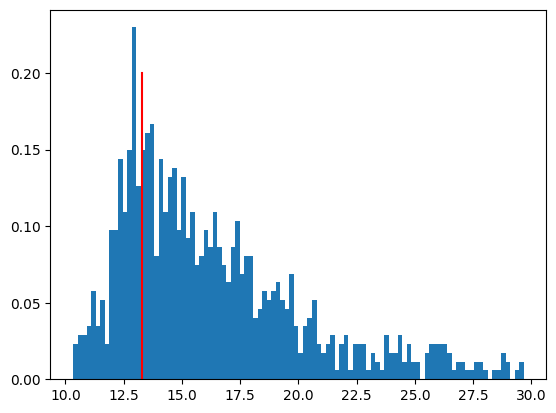

In [116]:
import math
def expectation_of_infinite_random_int(n):
    return sum([pow(2, generate_infinite_random_int()) for _ in range(n)]) / n

n = 10000
m = 1000
data = [expectation_of_infinite_random_int(n) for _ in range(m)]
data.sort()
plt.figure()
plt.hist(data[1:m*9//10], bins=100, density=True)
plt.plot([math.log2(n), math.log2(n)], [0, 0.2], 'r')
plt.show()

Seems correct. Note that we use `sort` and `data[1:m*9//10]` just to make the scale of the figure look better.